### 1.  Feedforward: Building a ReLU neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



Consider the rectified linear activation function : $h_j = max(0, a_j)$

1. Draw a network with:
    * 2 inputs
    * 1 hidden layers with 4 hidden units and a
    * 1-class output (for binary classification)


![](HW2_1.jpeg)

2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).
$$h_{11}=max(0,x_1\cdot W_{11}+x_2\cdot W_{21}+b_{11})$$
$$h_{12}=max(0,x_1\cdot W_{12}+x_2\cdot W_{22}+b_{12})$$
$$h_{13}=max(0,x_1\cdot W_{13}+x_2\cdot W_{23}+b_{13})$$
$$h_{14}=max(0,x_1\cdot W_{14}+x_2\cdot W_{24}+b_{14})$$
$$y=\sigma(h_{11}\cdot V_1+h_{12}\cdot V_2+h_{13}\cdot V_3+h_{14}\cdot V_4+b_2)$$


3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-np.array(z)))

def relu(z):
    z = np.array(z)
    return np.maximum(0,z)

def ff_nn_ReLu(X,W,V,b1,b2):
    h1 = relu(X.dot(W)+b1)
    y = sigmoid(h1.dot(V)+b2)
    return y

4. what are the class probabilities associated with the forward pass of each
sample?

In [3]:
X = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0,1],[0,0,0.5,1]])
V = np.array([1,0,-1,1]).reshape(4,1)
b1 = np.array([0,0,1,0])
b2 = np.array([1])

ff_nn_ReLu(X,W,V,b1,b2)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

###  Gradient Descent

Consider a simple non-convex function of two variables:
$$f(x,y)=(3-x^3)+50*(2y^2-x)^2$$

1. What are the partial derivatives of $f$ with respect to $x$ and to $y$?

$$\frac{\partial f}{\partial x}=-3x^2-200y^2+100x$$
$$\frac{\partial f}{\partial y}=400y(2y^2-x)$$

2. Create a visualization of the contours of this function.


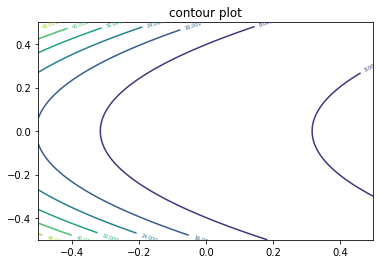

In [16]:
delta = 0.00025
a = np.arange(-0.5,0.5, delta)
b = np.arange(-0.5,0.5, delta)
X, Y = np.meshgrid(a, b)
Z = (3-X**3)+50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('contour plot')
ax.clabel(CS,inline = True, fontsize = 5)
plt.show()

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [47]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*y**2+100*x
    df_dy = 400*y*(2*y**2-x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-0.5,0.5,size=2)
    else:
        point = starting_point
      
    trajectory = [point]

    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate* grad
        trajectory.append(point)
    
    return np.array(trajectory)



def visualize(iters,lr):
    delta = 0.00025
    a = np.arange(-0.5,0.5, delta)
    b = np.arange(-0.5,0.5, delta)
    X, Y = np.meshgrid(a, b)
    Z = (3-X**3)+50*(2*Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    
    traj = grad_descent(iterations=iters, learning_rate=lr)
    x= traj[:,0]
    y= traj[:,1]
    x_min = np.round(x[len(x)-1],3)
    y_min = np.round(y[len(x)-1],3)
    plt.plot(x,y,'-o', markersize=3,linewidth=1,color="red")
    ax.set_title('Gradient descent with learning rate={} and iterations={}'.format(lr,iters))
    ax.clabel(CS,inline = True, fontsize = 5)
    ax.annotate('('+str(x_min)+','+str(y_min)+')',xy=(x_min,y_min))
    plt.show()

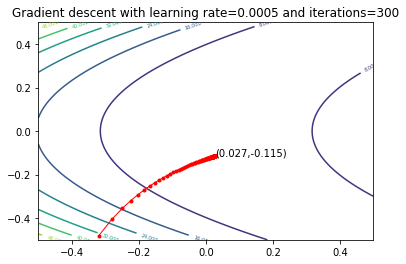

In [52]:
np.random.seed(11)
visualize(300,0.0005)

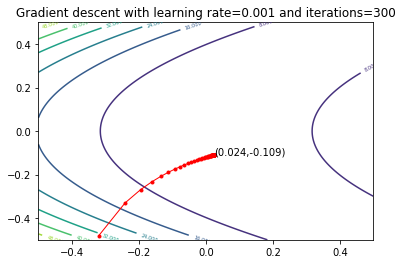

In [53]:
np.random.seed(11)
visualize(300,0.001)

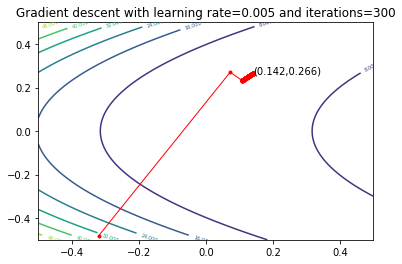

In [54]:
np.random.seed(11)
visualize(300,0.005)

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [70]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, learning_rate=10):
    if starting_point is None:
        point = np.random.uniform(-0.5,0.5,size=2)
    else:
        point = starting_point
      
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + learning_rate * grad
        point = point - v
        trajectory.append(point)
    
    return np.array(trajectory)

def visualize_mm(iters,lr,al):
    delta = 0.00025
    a = np.arange(-0.5,0.5, delta)
    b = np.arange(-0.5,0.5, delta)
    X, Y = np.meshgrid(a, b)
    Z = (3-X**3)+50*(2*Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    
    traj = grad_descent_with_momentum(iterations=iters, learning_rate=lr, alpha=al)
    x= traj[:,0]
    y= traj[:,1]
    x_min = np.round(x[len(x)-1],3)
    y_min = np.round(y[len(x)-1],3)
    plt.plot(x,y,'-o', markersize=3,linewidth=1,color="red")
    ax.set_title('Gradient descent with momentum: alpha={} learning rate={} and iterations={}'.format(al,lr,iters))
    ax.clabel(CS,inline = True, fontsize = 5)
    ax.annotate('('+str(x_min)+','+str(y_min)+')',xy=(x_min,y_min))
    plt.show()

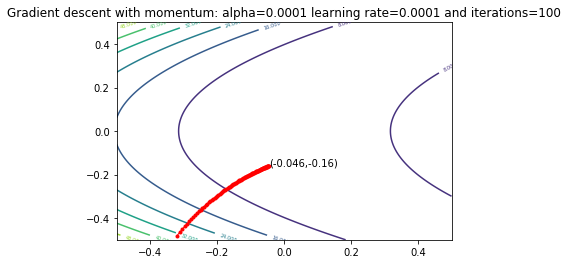

In [85]:
np.random.seed(11)
visualize_mm(100,0.0001,0.0001)

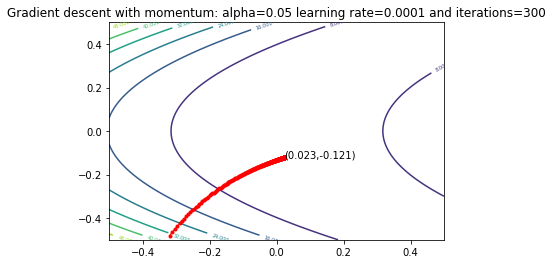

In [86]:
np.random.seed(11)
visualize_mm(300,0.0001,0.05)

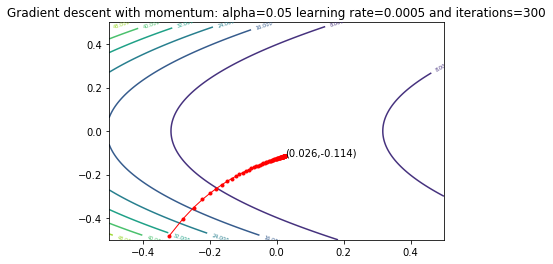

In [87]:
np.random.seed(11)
visualize_mm(300,0.0005,0.05)

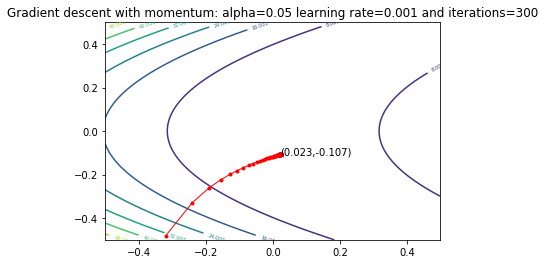

In [88]:
np.random.seed(11)
visualize_mm(300,0.001,0.05)

### Backprop

1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.

$$h_{11}=max(0,x_1\cdot W_{11}+x_2\cdot W_{21}+b_{11})$$
$$h_{12}=max(0,x_1\cdot W_{12}+x_2\cdot W_{22}+b_{12})$$
$$h_{13}=max(0,x_1\cdot W_{13}+x_2\cdot W_{23}+b_{13})$$
$$h_{14}=max(0,x_1\cdot W_{14}+x_2\cdot W_{24}+b_{14})$$
$$y=\sigma(h_{11}\cdot V_1+h_{12}\cdot V_2+h_{13}\cdot V_3+h_{14}\cdot V_4+b_2)$$
$$L=-ylog(\hat y)-(1-y)log(1-\hat y)$$
